In [74]:
!pip install mlxtend

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score 

In [9]:
data = pd.read_csv(r"C:\Users\rrajguru\Desktop\Data Science rajguru\bank-additional-full.csv", sep = ';')

In [10]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [13]:
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
!pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=e6366264a85bd744487741877fcd1ec7f34e6be6c7ab9635d71cb48da28aeabe
  Stored in directory: c:\users\rrajguru\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin


In [16]:
import pandas_profiling

In [17]:
pandas_profiling.ProfileReport(data)

In [19]:
data.drop_duplicates(inplace = True)

In [20]:
data['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [21]:
data["education"].replace({'basic.9y':'Basic','basic.6y':'Basic','basic.4y':'Basic'}, inplace = True)

In [22]:
data["education"].value_counts()

Basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [23]:
data["y"].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [24]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [28]:
data["y"] = np.where(data["y"]=="yes",1,0)

In [29]:
data.groupby('job').mean()

age    duration  campaign       pdays  previous  \
job                                                                    
admin.         38.186870  254.315961  2.623572  954.306363  0.189078   
blue-collar    39.555820  264.557549  2.558630  985.158867  0.122555   
entrepreneur   41.723214  263.267857  2.535714  981.267170  0.138736   
housemaid      45.500000  250.454717  2.639623  960.579245  0.137736   
management     42.362859  257.058140  2.476060  962.647059  0.185021   
retired        62.037253  273.909779  2.478463  897.818393  0.327707   
self-employed  39.949331  264.142153  2.660802  976.621393  0.143561   
services       37.925637  258.491303  2.588606  979.964457  0.155029   
student        25.894857  283.683429  2.104000  840.217143  0.524571   
technician     38.508681  250.287431  2.577831  964.387595  0.153880   
unemployed     39.733728  249.451677  2.564103  935.316568  0.199211   
unknown        45.563636  239.675758  2.648485  938.727273  0.154545   

               emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
job                                                                     
admin.             0.016028       93.534250     -40.245331   3.550668   
blue-collar        0.248903       93.656619     -41.376354   3.771879   
entrepreneur       0.158723       93.605372     -41.283654   3.791120   
housemaid          0.433396       93.676576     -39.495283   4.009645   
management        -0.012688       93.522755     -40.489466   3.611316   
retired           -0.697963       93.431084     -38.577474   2.769969   
self-employed      0.094159       93.559982     -40.488107   3.689376   
services           0.175548       93.634848     -41.289892   3.699441   
student           -1.408000       93.331613     -40.187543   1.884224   
technician         0.273898       93.561330     -39.926903   3.819722   
unemployed        -0.111736       93.563781     -40.007594   3.466583   
unknown            0.357879       93.718942     -38.797879   3.949033   

               nr.employed         y  
job                                   
admin.         5164.136990  0.129667  
blue-collar    5175.613488  0.068951  
entrepreneur   5176.313530  0.085165  
housemaid      5179.529623  0.100000  
management     5166.650513  0.112175  
retired        5122.261525  0.252619  
self-employed  5170.674384  0.104856  
services       5171.604159  0.081422  
student        5085.939086  0.314286  
technician     5175.617258  0.108325  
unemployed     5157.156509  0.142012  
unknown        5172.931818  0.112121

In [30]:
data.groupby('marital').mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
marital                                                                         
divorced  44.898937  253.836044  2.613316  968.633268  0.168727      0.163717   
married   42.307411  257.466996  2.573091  967.238754  0.155652      0.183656   
single    33.156866  261.554912  2.534244  949.892598  0.211432     -0.167840   
unknown   40.275000  312.725000  3.187500  937.100000  0.275000     -0.221250   

          cons.price.idx  cons.conf.idx  euribor3m  nr.employed         y  
marital                                                                    
divorced       93.606496     -40.706636   3.715333  5170.866233  0.103231  
married        93.597440     -40.271012   3.745829  5171.847029  0.101561  
single         93.517363     -40.919068   3.317548  5155.203416  0.140090  
unknown        93.471250     -40.820000   3.313037  5157.393750  0.150000

In [31]:
data.groupby('education').mean()

age    duration  campaign       pdays  previous  \
education                                                                    
Basic                42.164162  263.054987  2.559623  974.876039  0.141065   
high.school          37.996951  260.949117  2.568860  964.347456  0.185976   
illiterate           48.500000  276.777778  2.277778  943.833333  0.111111   
professional.course  40.083969  252.566603  2.586832  960.744084  0.163168   
university.degree    38.876356  253.237340  2.563713  951.792174  0.192453   
unknown              43.485549  262.491329  2.597110  942.798266  0.226590   

                     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
education                                                                     
Basic                    0.191256       93.639905     -40.927957   3.729564   
high.school              0.032843       93.584890     -40.940317   3.556085   
illiterate              -0.133333       93.317333     -39.950000   3.516556   
professional.course      0.172309       93.569755     -40.123893   3.709739   
university.degree       -0.027425       93.493711     -39.976726   3.530225   
unknown                  0.058324       93.658465     -39.876185   3.570291   

                     nr.employed         y  
education                                   
Basic                5172.012596  0.087036  
high.school          5164.988394  0.108389  
illiterate           5171.777778  0.222222  
professional.course  5170.122805  0.113550  
university.degree    5163.248027  0.137208  
unknown              5159.509884  0.145087

Text(0, 0.5, 'Purchase')

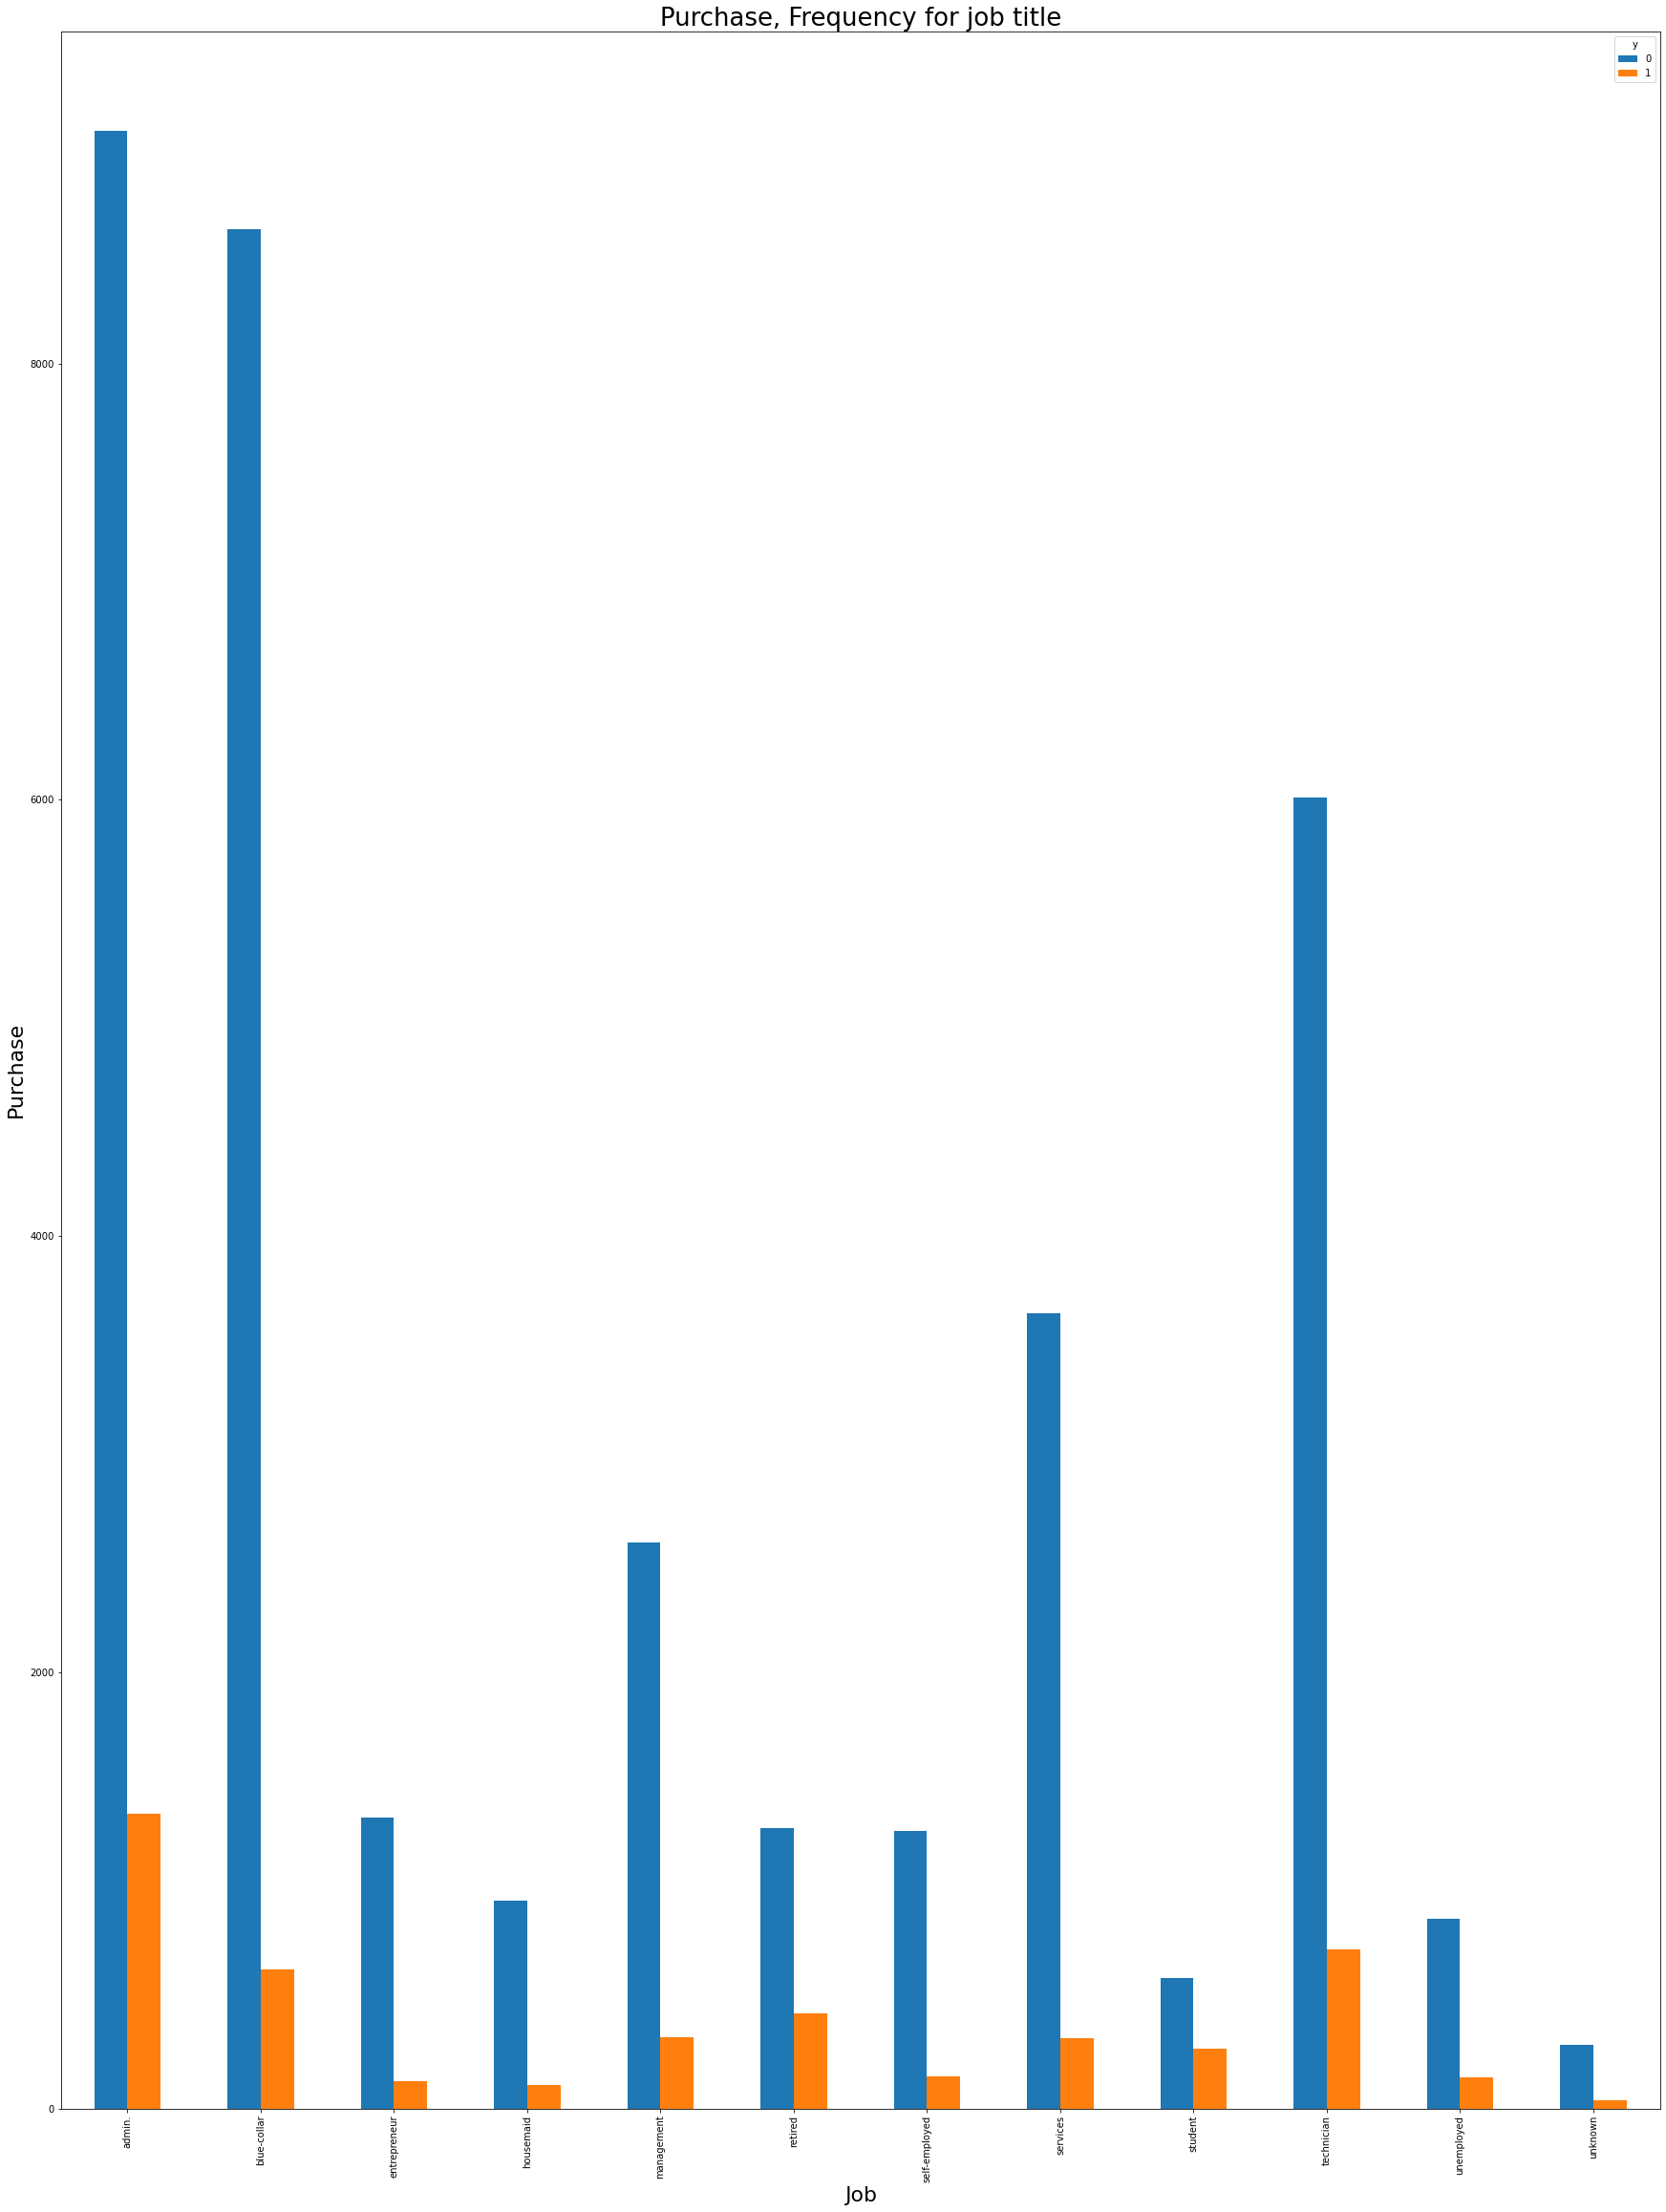

In [48]:
pd.crosstab(data["job"],data["y"]).plot(kind = 'bar', figsize = (30,40))
plt.title("Purchase, Frequency for job title", fontsize = 26)
plt.xlabel("Job", fontsize = 22)
plt.ylabel("Purchase", fontsize = 22)

In [44]:
pd.crosstab(data["marital"], data["y"], normalize = True)

y                0         1
marital                     
divorced  0.100423  0.011560
married   0.543763  0.061468
single    0.241500  0.039343
unknown   0.001651  0.000291

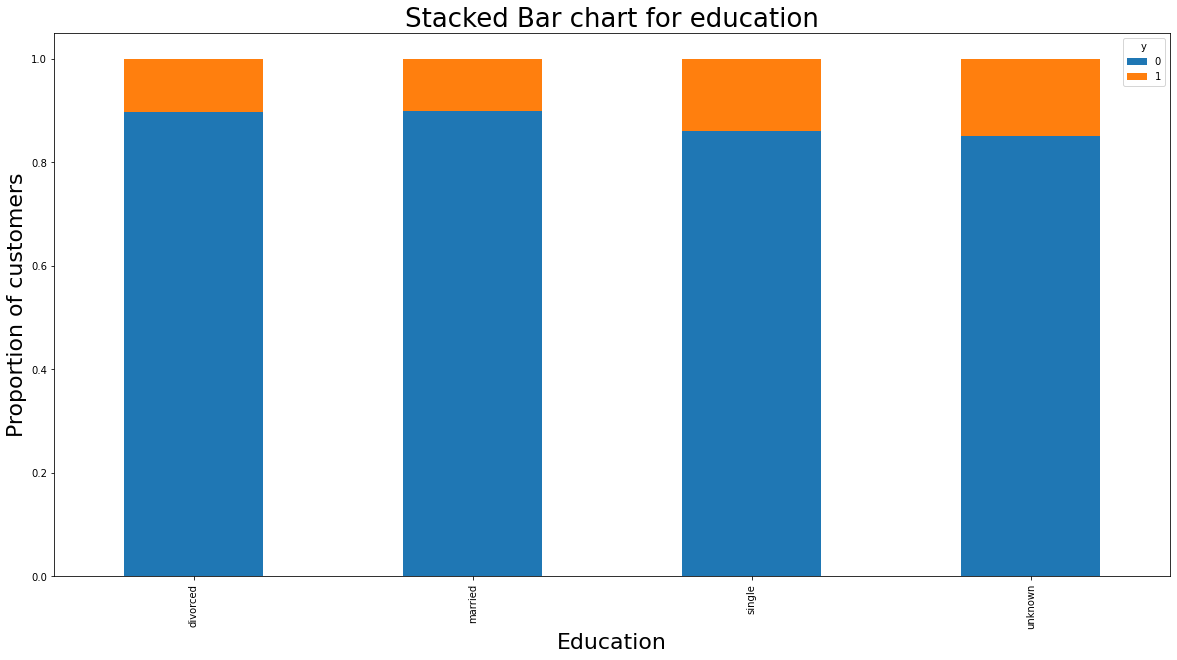

In [49]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis= 0).plot(kind = 'bar', stacked = True, figsize = (20,10))
plt.title("Stacked Bar chart for education", fontsize = 26)
plt.xlabel("Education", fontsize = 22)
plt.ylabel("Proportion of customers", fontsize = 22)
plt.savefig('edu_Vs_pur_stack')

In [53]:
data_numerical_columns = data.select_dtypes(include = np.number).drop(columns = 'y').columns

In [54]:
data_categorical_columns = data.select_dtypes(exclude = np.number).columns

In [57]:
#Create dummies for categorical variable

data_encoded_category = pd.get_dummies(data[data_categorical_columns])

In [58]:
data_encoded_category.shape

(41176, 51)

In [62]:
data_preprocessed = pd.concat([data[data_numerical_columns],data_encoded_category, data['y']],axis= 1)

In [64]:
X = data_preprocessed.drop(columns = 'y')

In [65]:
Y = data['y']

In [69]:
#Splitting the train_test data
train_X, test_X, train_Y, test_Y =train_test_split(X,Y,test_size = 0.3, random_state = 24)    

In [70]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((28823, 61), (12353, 61), (28823,), (12353,))

In [71]:
data['y'].value_counts(normalize = True)

0    0.887337
1    0.112663
Name: y, dtype: float64

In [72]:
train_Y.value_counts(normalize = True)

0    0.886514
1    0.113486
Name: y, dtype: float64

In [73]:
test_Y.value_counts(normalize = True)

0    0.889258
1    0.110742
Name: y, dtype: float64

In [76]:
#Model Building

In [110]:
### LogisticRegression

def run_model_validate(model, train_X, train_Y, test_X,test_Y):
    model.fit(train_X, train_Y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    print("Train Accuracy:",accuracy_score(train_Y,pred_train))
    print("Test Accuracy:",accuracy_score(test_Y,pred_test))
    
    print("Train f1 Score:",f1_score(train_Y,pred_train))
    print("Test f1 Score :",f1_score(test_Y,pred_test))
    
    print("Train Confusion Matrix:",confusion_matrix(train_Y,pred_train))
    print("Test Confusion Matrix :",confusion_matrix(test_Y,pred_test))
    
    print("Train Classification report:",classification_report(train_Y,pred_train))
    print("Test Classification report:",classification_report(test_Y,pred_test))
    
    return model, accuracy_score(test_Y,pred_test), f1_score(test_Y, pred_test)
    

In [111]:
model = LogisticRegression(max_iter= 10000)
model_name,accuracy, f1score = run_model_validation(model, train_X, train_Y, test_X, test_Y)

Train Accuracy: 0.9101412066752247
Test Accuracy: 0.9102242370274427
Train f1 Score: 0.5115050924179554
Test f1 Score : 0.4997744700045107
Train Confusion Matrix: [[24877   675]
 [ 1915  1356]]
Test Confusion Matrix : [[10690   295]
 [  814   554]]
Train Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.67      0.41      0.51      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.69      0.73     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.65      0.40      0.50      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353



In [113]:
model = [LogisticRegression(penalty = 'none'), LogisticRegression(solver = 'liblinear',penalty='l1'), LogisticRegression(penalty='l2'), 
        LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet'),
         KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

result = []
for i in model:
  model_name, accuracy, f1score = run_model_validate(i, train_X, train_Y, test_X, test_Y)
  result.append([model_name, accuracy, f1score])

C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.9085105644797558
Test Accuracy: 0.9097385250546426
Train f1 Score: 0.4931770132615799
Test f1 Score : 0.4873563218390805
Train Confusion Matrix: [[24903   649]
 [ 1988  1283]]
Test Confusion Matrix : [[10708   277]
 [  838   530]]
Train Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.66      0.39      0.49      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.68      0.72     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.66      0.39      0.49      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.68      0.72     12353
weighted avg       0.90      0.91      0.90     12353



C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train Accuracy: 0.9111473476043438
Test Accuracy: 0.9107909009957096
Train f1 Score: 0.5194220303996998
Test f1 Score : 0.49909090909090914
Train Confusion Matrix: [[24878   674]
 [ 1887  1384]]
Test Confusion Matrix : [[10702   283]
 [  819   549]]
Train Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.67      0.42      0.52      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.70      0.74     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.66      0.40      0.50      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353



C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.9091350657461056
Test Accuracy: 0.9096575730591759
Train f1 Score: 0.5008576329331046
Test f1 Score : 0.4913400182315405
Train Confusion Matrix: [[24890   662]
 [ 1957  1314]]
Test Confusion Matrix : [[10698   287]
 [  829   539]]
Train Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.66      0.40      0.50      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.69      0.73     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.65      0.39      0.49      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.68      0.72     12353
weighted avg       0.90      0.91      0.90     12353



C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Train Accuracy: 0.9059778648995593
Test Accuracy: 0.9060956852586416
Train f1 Score: 0.43915562913907286
Test f1 Score : 0.4285714285714286
Train Confusion Matrix: [[25052   500]
 [ 2210  1061]]
Test Confusion Matrix : [[10758   227]
 [  933   435]]
Train Classification report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95     25552
           1       0.68      0.32      0.44      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.65      0.69     28823
weighted avg       0.89      0.91      0.89     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10985
           1       0.66      0.32      0.43      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.65      0.69     12353
weighted avg       0.89      0.91      0.89     12353

Train Accuracy: 0.930645664920376
Test 

In [114]:
result =[]
for i in model:
    model_name, accuracy, f1score = run_model_validation(i,train_X, train_Y, test_X, test_Y)
    result.append([model_name,accuracy, f1score])

C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.9085105644797558
Test Accuracy: 0.9097385250546426
Train f1 Score: 0.4931770132615799
Test f1 Score : 0.4873563218390805
Train Confusion Matrix: [[24903   649]
 [ 1988  1283]]
Test Confusion Matrix : [[10708   277]
 [  838   530]]
Train Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.66      0.39      0.49      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.68      0.72     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.66      0.39      0.49      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.68      0.72     12353
weighted avg       0.90      0.91      0.90     12353



C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train Accuracy: 0.9112167366339382
Test Accuracy: 0.9108718529911762
Train f1 Score: 0.519617045241224
Test f1 Score : 0.4993178717598909
Train Confusion Matrix: [[24880   672]
 [ 1887  1384]]
Test Confusion Matrix : [[10703   282]
 [  819   549]]
Train Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.67      0.42      0.52      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.70      0.74     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.66      0.40      0.50      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353



C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.9091350657461056
Test Accuracy: 0.9096575730591759
Train f1 Score: 0.5008576329331046
Test f1 Score : 0.4913400182315405
Train Confusion Matrix: [[24890   662]
 [ 1957  1314]]
Test Confusion Matrix : [[10698   287]
 [  829   539]]
Train Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     25552
           1       0.66      0.40      0.50      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.69      0.73     28823
weighted avg       0.90      0.91      0.90     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10985
           1       0.65      0.39      0.49      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.68      0.72     12353
weighted avg       0.90      0.91      0.90     12353



C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Train Accuracy: 0.9059778648995593
Test Accuracy: 0.9060956852586416
Train f1 Score: 0.43915562913907286
Test f1 Score : 0.4285714285714286
Train Confusion Matrix: [[25052   500]
 [ 2210  1061]]
Test Confusion Matrix : [[10758   227]
 [  933   435]]
Train Classification report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95     25552
           1       0.68      0.32      0.44      3271

    accuracy                           0.91     28823
   macro avg       0.80      0.65      0.69     28823
weighted avg       0.89      0.91      0.89     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10985
           1       0.66      0.32      0.43      1368

    accuracy                           0.91     12353
   macro avg       0.79      0.65      0.69     12353
weighted avg       0.89      0.91      0.89     12353

Train Accuracy: 0.930645664920376
Test 

In [115]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

Model  Accuracy  F1 Score
0                 LogisticRegression(penalty='none')  0.909739  0.487356
1  LogisticRegression(penalty='l1', solver='libli...  0.910872  0.499318
2                               LogisticRegression()  0.909658  0.491340
3  LogisticRegression(l1_ratio=0.5, penalty='elas...  0.906096  0.428571
4                             KNeighborsClassifier()  0.907067  0.543720
5                           DecisionTreeClassifier()  0.884643  0.495932
6  (DecisionTreeClassifier(max_features='auto', r...  0.913462  0.536628
7  (DecisionTreeClassifier(max_depth=1, random_st...  0.908929  0.484182
8  ([DecisionTreeRegressor(criterion='friedman_ms...  0.916215  0.574949

In [116]:
result

[[LogisticRegression(penalty='none'), 0.9097385250546426, 0.4873563218390805],
 [LogisticRegression(penalty='l1', solver='liblinear'),
  0.9108718529911762,
  0.4993178717598909],
 [LogisticRegression(), 0.9096575730591759, 0.4913400182315405],
 [LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga'),
  0.9060956852586416,
  0.4285714285714286],
 [KNeighborsClassifier(), 0.9070671092042419, 0.5437201907790143],
 [DecisionTreeClassifier(), 0.8846434064599692, 0.4959320834807216],
 [RandomForestClassifier(), 0.9134623168461102, 0.5366276549631556],
 [AdaBoostClassifier(), 0.9089290050999758, 0.484181568088033],
 [GradientBoostingClassifier(), 0.9162146846919776, 0.5749486652977412]]

In [117]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()

estimators = []
estimators.append(('GBM', model1))
estimators.append(('RF', model2))
estimators.append(('KNN', model3))

voting_model = VotingClassifier(estimators)

In [119]:
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, train_Y, test_X, test_Y)
result.append([model_name, accuracy, f1score])

Train Accuracy: 0.95236443118343
Test Accuracy: 0.9169432526511778
Train f1 Score: 0.7681134943421719
Test f1 Score : 0.5710702341137124
Train Confusion Matrix: [[25176   376]
 [  997  2274]]
Test Confusion Matrix : [[10644   341]
 [  685   683]]
Train Classification report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     25552
           1       0.86      0.70      0.77      3271

    accuracy                           0.95     28823
   macro avg       0.91      0.84      0.87     28823
weighted avg       0.95      0.95      0.95     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10985
           1       0.67      0.50      0.57      1368

    accuracy                           0.92     12353
   macro avg       0.80      0.73      0.76     12353
weighted avg       0.91      0.92      0.91     12353



In [121]:
voting_model = VotingClassifier(estimators, voting = 'soft')
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, train_Y, test_X, test_Y)
result.append([model_name, accuracy, f1score])

Train Accuracy: 0.964576900392048
Test Accuracy: 0.9152432607463774
Train f1 Score: 0.8276793248945147
Test f1 Score : 0.562839248434238
Train Confusion Matrix: [[25350   202]
 [  819  2452]]
Test Confusion Matrix : [[10632   353]
 [  694   674]]
Train Classification report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98     25552
           1       0.92      0.75      0.83      3271

    accuracy                           0.96     28823
   macro avg       0.95      0.87      0.90     28823
weighted avg       0.96      0.96      0.96     28823

Test Classification report:               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10985
           1       0.66      0.49      0.56      1368

    accuracy                           0.92     12353
   macro avg       0.80      0.73      0.76     12353
weighted avg       0.91      0.92      0.91     12353



In [122]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

Model  Accuracy  F1 Score
0                  LogisticRegression(penalty='none')  0.909739  0.487356
1   LogisticRegression(penalty='l1', solver='libli...  0.910872  0.499318
2                                LogisticRegression()  0.909658  0.491340
3   LogisticRegression(l1_ratio=0.5, penalty='elas...  0.906096  0.428571
4                              KNeighborsClassifier()  0.907067  0.543720
5                            DecisionTreeClassifier()  0.884643  0.495932
6   (DecisionTreeClassifier(max_features='auto', r...  0.913462  0.536628
7   (DecisionTreeClassifier(max_depth=1, random_st...  0.908929  0.484182
8   ([DecisionTreeRegressor(criterion='friedman_ms...  0.916215  0.574949
9   VotingClassifier(estimators=[('GBM', GradientB...  0.916943  0.571070
10  VotingClassifier(estimators=[('GBM', GradientB...  0.915243  0.562839

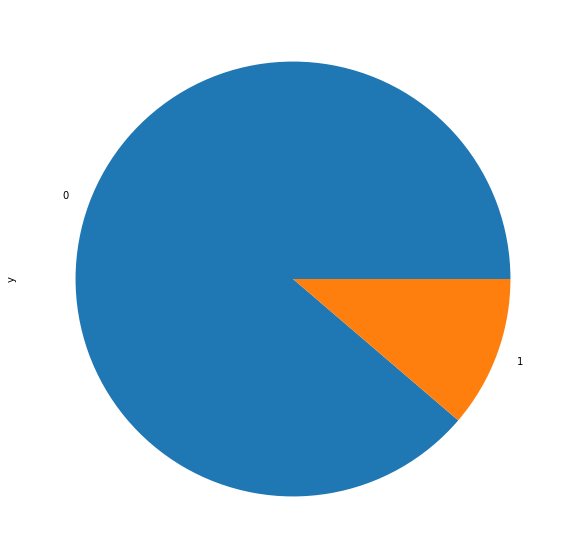

In [123]:
data["y"].value_counts().plot(kind = "pie", figsize = (10,10))

In [124]:
data_preprocessed.y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [125]:
accept = data_preprocessed[data_preprocessed["y"]==1]

In [126]:
accept.shape

(4639, 62)

In [127]:
reject = data_preprocessed[data_preprocessed["y"]==0]

In [128]:
reject.shape

(36537, 62)

In [129]:
selected_reject = reject.sample(n = 4639, random_state= 20)

In [130]:
data_undersample = pd.concat([accept,selected_reject ])

In [131]:
data_undersample.shape

(9278, 62)

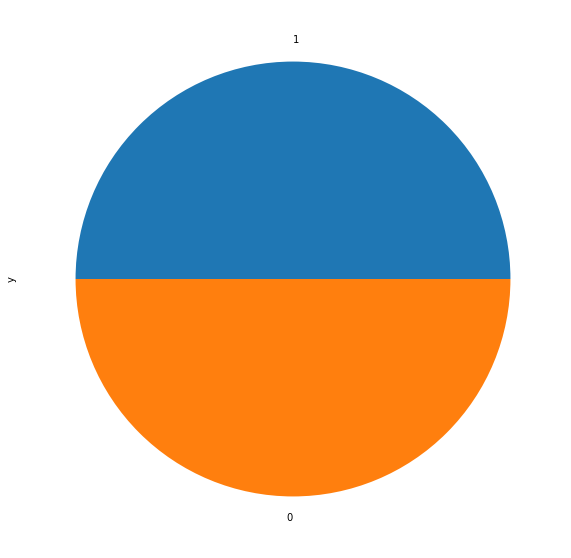

In [132]:
data_undersample["y"].value_counts().plot(kind = "pie", figsize = (10,10))

In [133]:
X = data_undersample.drop(columns='y')

In [134]:
y = data_undersample['y']

In [135]:
#Train Test split

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state = 24)

In [136]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((6494, 61), (2784, 61), (6494,), (2784,))

In [137]:
data_undersample['y'].value_counts(normalize = True)

1    0.5
0    0.5
Name: y, dtype: float64

In [138]:
train_y.value_counts(normalize = True)

1    0.500154
0    0.499846
Name: y, dtype: float64

In [139]:
test_y.value_counts(normalize = True)

0    0.500359
1    0.499641
Name: y, dtype: float64

In [140]:
model = [LogisticRegression(penalty = 'none'), LogisticRegression(solver = 'liblinear',penalty='l1'), LogisticRegression(penalty='l2'), 
        LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet'),
         KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

result = []
for i in model:
  model_name, accuracy, f1score = run_model_validate(i, train_X, train_y, test_X, test_y)
  result.append([model_name, accuracy, f1score])

C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.8646442870341854
Test Accuracy: 0.8613505747126436
Train f1 Score: 0.865452318995867
Test f1 Score : 0.8627311522048365
Train Confusion Matrix: [[2788  458]
 [ 421 2827]]
Test Confusion Matrix : [[1185  208]
 [ 178 1213]]
Train Classification report:               precision    recall  f1-score   support

           0       0.87      0.86      0.86      3246
           1       0.86      0.87      0.87      3248

    accuracy                           0.86      6494
   macro avg       0.86      0.86      0.86      6494
weighted avg       0.86      0.86      0.86      6494

Test Classification report:               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1393
           1       0.85      0.87      0.86      1391

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784



C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train Accuracy: 0.8743455497382199
Test Accuracy: 0.8721264367816092
Train f1 Score: 0.8759878419452887
Test f1 Score : 0.8746478873239436
Train Confusion Matrix: [[2796  450]
 [ 366 2882]]
Test Confusion Matrix : [[1186  207]
 [ 149 1242]]
Train Classification report:               precision    recall  f1-score   support

           0       0.88      0.86      0.87      3246
           1       0.86      0.89      0.88      3248

    accuracy                           0.87      6494
   macro avg       0.87      0.87      0.87      6494
weighted avg       0.87      0.87      0.87      6494

Test Classification report:               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1393
           1       0.86      0.89      0.87      1391

    accuracy                           0.87      2784
   macro avg       0.87      0.87      0.87      2784
weighted avg       0.87      0.87      0.87      2784



C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.8626424391746227
Test Accuracy: 0.8573994252873564
Train f1 Score: 0.8631901840490798
Test f1 Score : 0.8584670231729055
Train Confusion Matrix: [[2788  458]
 [ 434 2814]]
Test Confusion Matrix : [[1183  210]
 [ 187 1204]]
Train Classification report:               precision    recall  f1-score   support

           0       0.87      0.86      0.86      3246
           1       0.86      0.87      0.86      3248

    accuracy                           0.86      6494
   macro avg       0.86      0.86      0.86      6494
weighted avg       0.86      0.86      0.86      6494

Test Classification report:               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1393
           1       0.85      0.87      0.86      1391

    accuracy                           0.86      2784
   macro avg       0.86      0.86      0.86      2784
weighted avg       0.86      0.86      0.86      2784



C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Train Accuracy: 0.7802587003387742
Test Accuracy: 0.7823275862068966
Train f1 Score: 0.7619683069224353
Test f1 Score : 0.7610410094637224
Train Confusion Matrix: [[2783  463]
 [ 964 2284]]
Test Confusion Matrix : [[1213  180]
 [ 426  965]]
Train Classification report:               precision    recall  f1-score   support

           0       0.74      0.86      0.80      3246
           1       0.83      0.70      0.76      3248

    accuracy                           0.78      6494
   macro avg       0.79      0.78      0.78      6494
weighted avg       0.79      0.78      0.78      6494

Test Classification report:               precision    recall  f1-score   support

           0       0.74      0.87      0.80      1393
           1       0.84      0.69      0.76      1391

    accuracy                           0.78      2784
   macro avg       0.79      0.78      0.78      2784
weighted avg       0.79      0.78      0.78      2784

Train Accuracy: 0.8925161687711733
Test Accuracy

In [141]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

Model  Accuracy  F1 Score
0                 LogisticRegression(penalty='none')  0.861351  0.862731
1  LogisticRegression(penalty='l1', solver='libli...  0.872126  0.874648
2                               LogisticRegression()  0.857399  0.858467
3  LogisticRegression(l1_ratio=0.5, penalty='elas...  0.782328  0.761041
4                             KNeighborsClassifier()  0.849856  0.851983
5                           DecisionTreeClassifier()  0.837644  0.838225
6  (DecisionTreeClassifier(max_features='auto', r...  0.887213  0.891873
7  (DecisionTreeClassifier(max_depth=1, random_st...  0.875000  0.876157
8  ([DecisionTreeRegressor(criterion='friedman_ms...  0.890445  0.894936

In [142]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
model3 = LogisticRegression(solver = 'liblinear',penalty='l1')


estimators = []
estimators.append(('GBM', model1))
estimators.append(('RF', model2))
estimators.append(('LR', model3))

voting_model = VotingClassifier(estimators)

In [143]:
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, train_y, test_X, test_y)
result.append([model_name, accuracy, f1score])

C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train Accuracy: 0.9145364952263628
Test Accuracy: 0.8911637931034483
Train f1 Score: 0.9169037281030095
Test f1 Score : 0.8954812004139358
Train Confusion Matrix: [[2877  369]
 [ 186 3062]]
Test Confusion Matrix : [[1183  210]
 [  93 1298]]
Train Classification report:               precision    recall  f1-score   support

           0       0.94      0.89      0.91      3246
           1       0.89      0.94      0.92      3248

    accuracy                           0.91      6494
   macro avg       0.92      0.91      0.91      6494
weighted avg       0.92      0.91      0.91      6494

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.85      0.89      1393
           1       0.86      0.93      0.90      1391

    accuracy                           0.89      2784
   macro avg       0.89      0.89      0.89      2784
weighted avg       0.89      0.89      0.89      2784



In [144]:
voting_model = VotingClassifier(estimators, voting = 'soft')
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, train_y, test_X, test_y)
result.append([model_name, accuracy, f1score])

C:\Users\rrajguru\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train Accuracy: 0.932245149368648
Test Accuracy: 0.8911637931034483
Train f1 Score: 0.9342694950702121
Test f1 Score : 0.8959835221421215
Train Confusion Matrix: [[2927  319]
 [ 121 3127]]
Test Confusion Matrix : [[1176  217]
 [  86 1305]]
Train Classification report:               precision    recall  f1-score   support

           0       0.96      0.90      0.93      3246
           1       0.91      0.96      0.93      3248

    accuracy                           0.93      6494
   macro avg       0.93      0.93      0.93      6494
weighted avg       0.93      0.93      0.93      6494

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.84      0.89      1393
           1       0.86      0.94      0.90      1391

    accuracy                           0.89      2784
   macro avg       0.89      0.89      0.89      2784
weighted avg       0.89      0.89      0.89      2784



In [145]:
pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

Model  Accuracy  F1 Score
0                  LogisticRegression(penalty='none')  0.861351  0.862731
1   LogisticRegression(penalty='l1', solver='libli...  0.872126  0.874648
2                                LogisticRegression()  0.857399  0.858467
3   LogisticRegression(l1_ratio=0.5, penalty='elas...  0.782328  0.761041
4                              KNeighborsClassifier()  0.849856  0.851983
5                            DecisionTreeClassifier()  0.837644  0.838225
6   (DecisionTreeClassifier(max_features='auto', r...  0.887213  0.891873
7   (DecisionTreeClassifier(max_depth=1, random_st...  0.875000  0.876157
8   ([DecisionTreeRegressor(criterion='friedman_ms...  0.890445  0.894936
9   VotingClassifier(estimators=[('GBM', GradientB...  0.891164  0.895481
10  VotingClassifier(estimators=[('GBM', GradientB...  0.891164  0.895984

In [146]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
model3 = LogisticRegression(solver = 'liblinear',penalty='l1')

In [149]:
import warnings
warnings.simplefilter('ignore')

clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = LogisticRegression(solver = 'liblinear',penalty='l1')

lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['GBM', 
                       'Random Forest', 
                       'Logistic Regression',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X, y, cv=3)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.45 (+/- 0.01) [GBM]
Accuracy: 0.45 (+/- 0.01) [Random Forest]
Accuracy: 0.56 (+/- 0.08) [Logistic Regression]
Accuracy: 0.45 (+/- 0.01) [StackingClassifier]


In [152]:
estimators = [('GBM', GradientBoostingClassifier()),
              ('RF', RandomForestClassifier()),
              ('LR', LogisticRegression(solver = 'liblinear',penalty='l1'))]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [153]:
model_name, accuracy, f1score = run_model_validate(clf, train_X, train_Y, test_X, test_Y)
result.append([model_name, accuracy, f1score])

Train Accuracy: 0.9447182014166924
Test Accuracy: 0.8951149425287356
Train f1 Score: 0.9458603528879506
Test f1 Score : 0.8988218988218989
Train Confusion Matrix: [[2999  247]
 [ 112 3136]]
Test Confusion Matrix : [[1195  198]
 [  94 1297]]
Train Classification report:               precision    recall  f1-score   support

           0       0.96      0.92      0.94      3246
           1       0.93      0.97      0.95      3248

    accuracy                           0.94      6494
   macro avg       0.95      0.94      0.94      6494
weighted avg       0.95      0.94      0.94      6494

Test Classification report:               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1393
           1       0.87      0.93      0.90      1391

    accuracy                           0.90      2784
   macro avg       0.90      0.90      0.89      2784
weighted avg       0.90      0.90      0.89      2784



In [154]:
final_result = pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

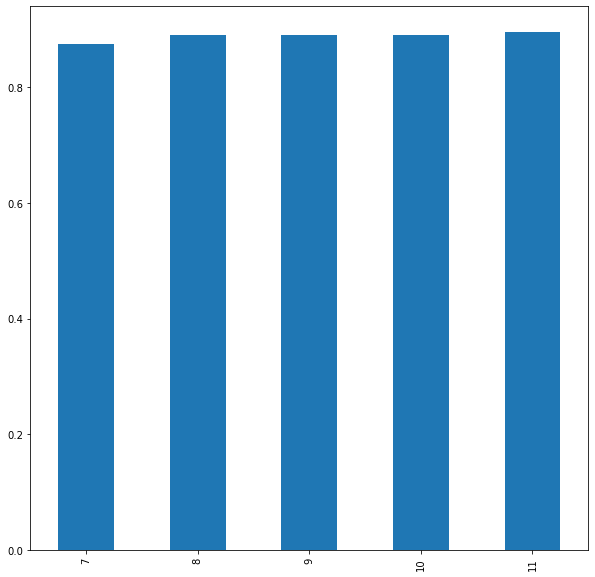

In [155]:
final_result["Accuracy"].tail().plot(kind = "bar", figsize = (10,10))